Набор данных из 50 лучших бестселлеров Amazon с 2009 по 2019 год.
Содержит 550 книг, данные были разделены на художественную и научную литературу.

In [2]:
from pylab import rcParams
rcParams['figure.figsize'] = 10,7

import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('bestsellers with categories.csv')
#print(df.shape)
df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


Text(0.5, 1.0, 'Распределение оценок пользователей')

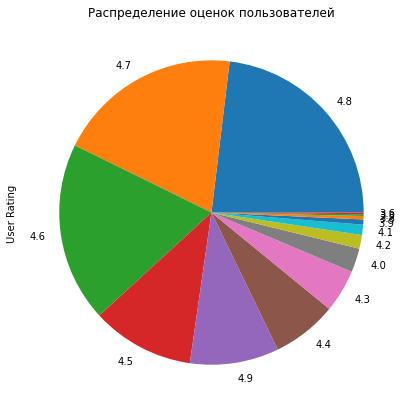

In [74]:
#name_dynamics = df.groupby(['User Rating']).sum().sort_values(by='Reviews', ascending=False).head()
 #name_dynamics
#name_dynamics.plot(kind='pie', y='Reviews')
name_dynamics = df['User Rating'].value_counts()
name_dynamics.plot(kind='pie', y='Count')
plt.title('Распределение оценок пользователей')

Круговая диаграмма показывает распределение оценок пользователей. Исходя из диаграммы, можно сделать вывод, что большинство книг имеют рейтинг 4.6, 4.7 и 4.8, причем оценок 4.8. выставлено больше всего.

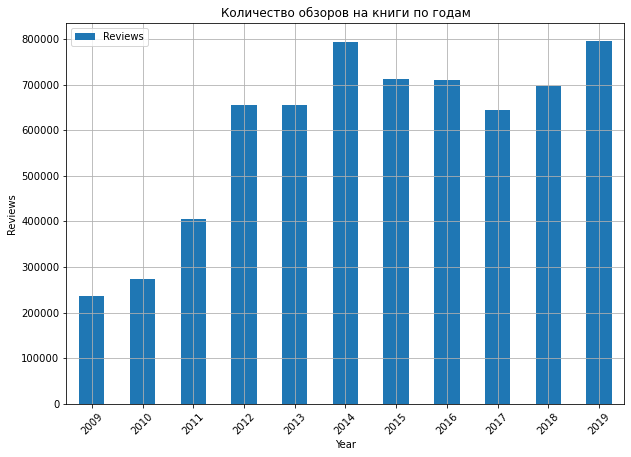

In [73]:
df1 = df[[x for x in df.columns if 'Reviews' in x] + ['Year']]\
    .groupby('Year').sum()
#df1.head()
#df1.plot()
df1.plot(kind='bar', rot=45)
plt.xlabel('Year')
plt.ylabel('Reviews')
plt.title('Количество обзоров на книги по годам')
plt.grid()

In [ ]:
Из диаграммы видно, что больше всего обзоров на книги из набора было написано в 2014 и 2019 годах, меньше всего - в 2009.

D:\python\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Распределение цен на книги')

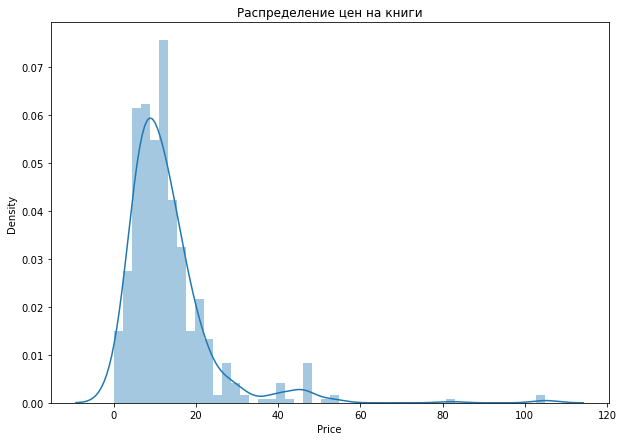

In [75]:
import seaborn as sns
#sns.jointplot(x='Reviews', y='Year', 
              #data=df, kind='reg')
#sns_plot = sns.pairplot(
#df[['Reviews', 'Author', 'Year']])
#sns_plot
sns.distplot(df.Price)
plt.title('Распределение цен на книги')

Из диаграммы видно, что большинство книг имеют цену, принадлежащую диапазону 0-20 долларов.

In [65]:
top_authors_df = df.groupby('Author')[['Reviews']].sum()\
    .sort_values('Reviews', ascending=False).head(10)
top_authors_df.style.bar()

,Reviews
Author,
Suzanne Collins,278329
John Green,210419
E L James,178011
Dr. Seuss,176545
Gillian Flynn,171813
Paula Hawkins,158892
Laura Hillenbrand,148365
Harper Lee,146152
Gary Chapman,145958


Видно, что на произведения автора Suzanne Collins написано больше всего обзоров.

**boxplot**

Text(0.5, 1.0, 'Распределение цен на книги авторов')

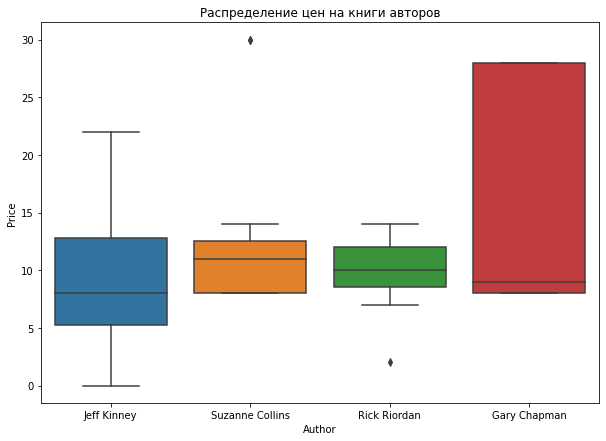

In [89]:
top_authors = df.Author.value_counts().sort_values(ascending=False).head(4).index.values
top_authors
ax = sns.boxplot(x="Author", y="Price", 
            data=df[df.Author.isin(top_authors)])
plt.title('Распределение цен на книги авторов')

На диаграмме представлены 4 автора, написавших больше всего произведений. Можно судить, что книги трех из четырех авторов придерживаются почти одинаковой ценовой политики - цена за один экземпляр книги держится в районе десяти долларов. Книги автора Gary Chapman являются самыми дорогими. Самый большой размах наблюдается у автора Jeff Kinney. У авторов Suzanne Collins и Rick Riordan наблюдаются выбросы.

**heatmap**

In [91]:
#genre_author_price = df.pivot_table(
#                        index='Genre', 
 #                       columns='Author', 
 #                       values='Price', 
 #                       aggfunc=sum).fillna(0).applymap(float)

#genre_author_price
genre_rating_price = df.pivot_table(
                        index='Genre', 
                        columns='User Rating', 
                        values='Price', 
                        aggfunc=sum).fillna(0).applymap(float)

genre_rating_price

User Rating,3.3,3.6,3.8,3.9,4.0,4.1,4.2,4.3,4.4,4.5,4.6,4.7,4.8,4.9
Genre,,,,,,,,,,,,,,
Fiction,12.0,19.0,28.0,53.0,52.0,49.0,35.0,143.0,81.0,204.0,301.0,500.0,749.0,378.0
Non Fiction,0.0,0.0,0.0,0.0,153.0,21.0,58.0,189.0,468.0,1052.0,969.0,903.0,631.0,157.0


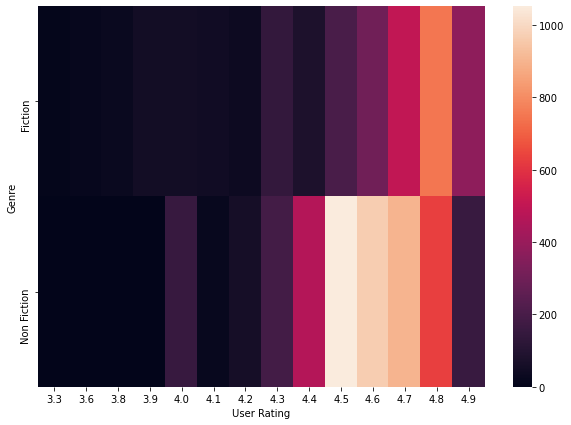

In [92]:
ax = sns.heatmap(genre_rating_price)

Из диаграммы видно, что книги жанра Non Fiction с рейтингом пользователей 4.5-4.7. суммарно стоят дороже всего.

In [ ]:
**scatter plot matrix**

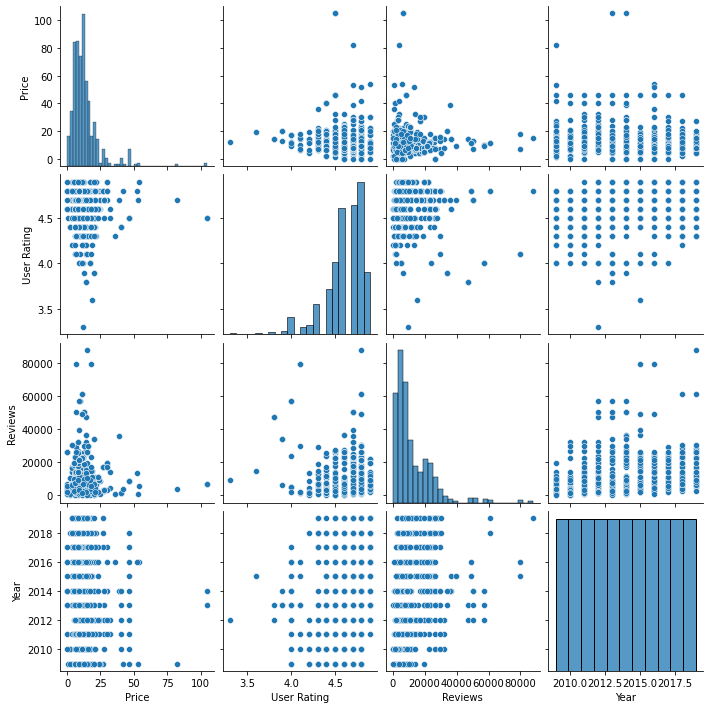

In [93]:
sns_plot = sns.pairplot(
    df[['Price','User Rating','Reviews','Year']])
sns_plot

Из диаграммы можно сделать следующие выводы:
1. Стоимость книг за представленные года практически не изменялась, имели место выбросы.
2. Только некоторые книги имеют сравнительно большое количество обзоров.
3. Большая часть книг стоимостью до 25 долларов имеет рейтинг выше 4.5.